# Plot Trials

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

In [2]:
ascending_heading = -12
descending_heading = -167
incidence_angle = 34

In [3]:
def unit_vector_from_angles(heading_angle_degrees, incidence_angle_degrees):
    # Convert angles to radians
    heading_angle_start_at_east = 90 - heading_angle_degrees
    heading_los = heading_angle_start_at_east + 90
    heading_angle_radians = np.radians(heading_los)

    incidence_angle_sensor_to_ground = -(90 - incidence_angle_degrees)
    incidence_angle_radians = np.radians(incidence_angle_sensor_to_ground)

    # Calculate the vector components
    x_component = np.cos(heading_angle_radians) * np.cos(incidence_angle_radians)
    y_component = np.sin(heading_angle_radians) * np.cos(incidence_angle_radians)
    z_component = np.sin(incidence_angle_radians)

    # Create a NumPy array for the vector
    vector = np.array([x_component, y_component, z_component])

    # Normalize the vector to obtain the unit vector
    unit_vector = (vector / np.linalg.norm(vector)).round(5)

    return unit_vector


def unit_vector_to_rgb(unit_vector):
    centered_rgb = (unit_vector * 127.5) + 127.5
    rounded = centered_rgb.round(0).astype(int)
    return rounded

def unit_vector_to_hex(unit_vector):
    centered_rgb = (unit_vector * 127.5) + 127.5
    r,g,b = centered_rgb.round(0).astype(int)
    hex_color = f'#{r:02X}{g:02X}{b:02X}'
    return hex_color

def angles_to_rgb(heading_angle_degrees, incidence_angle_degrees, hex=False):
    unit_vector = unit_vector_from_angles(heading_angle_degrees, incidence_angle_degrees)
    rgb = unit_vector_to_rgb(unit_vector)
    r, g, b = rgb
    if hex:
        hex_color = f'#{r:02X}{g:02X}{b:02X}'
        return hex_color
    return rgb


def create_line(heading_angle_degrees, incidence_angle_degrees, heading=True):
    unit_vector = unit_vector_from_angles(heading_angle_degrees, incidence_angle_degrees)
    point1 = [0,0,0]
    point2 = point1 + (1 * unit_vector)
    x, y, z = [[i,j] for i,j in zip(point1, point2)]
    color = angles_to_rgb(heading_angle_degrees, incidence_angle_degrees, hex=True)
    pd.DataFrame({'x':x,'y':y,'z':z})


def get_heading_line(vector):
    projected_vector = vector.copy()
    projected_vector[2] = 0
    unit_vector = (projected_vector / np.linalg.norm(projected_vector)).round(5)
    x = [0, unit_vector[0]]
    y = [0, unit_vector[1]]
    return x,y

def get_incidence_line(vector, vertical_offset=1):
    slope = vector[2] / np.sqrt(vector[0]**2 + vector[1]**2)
    y = np.array([-1, 0, 1])
    x = y / slope
    y += vertical_offset
    colors = [unit_vector_to_hex(v*-1), unit_vector_to_hex(v)]
    return x, y, colors

In [4]:
v = unit_vector_from_angles(ascending_heading, incidence_angle)

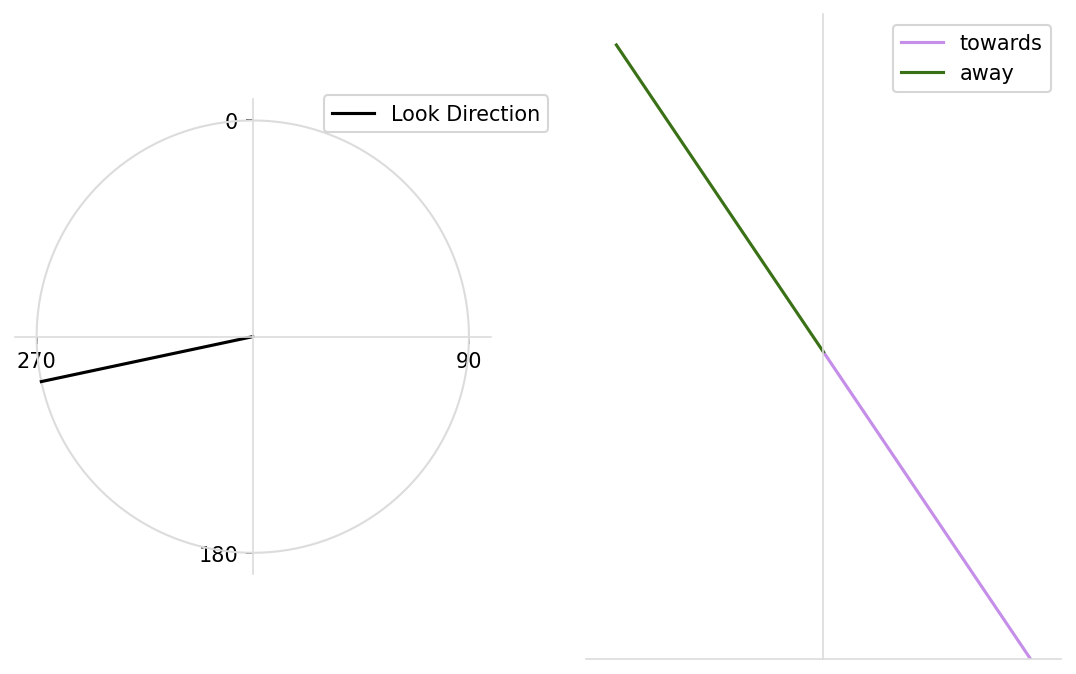

In [38]:
bg_color = '#dcdcdc'
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 18), dpi=150)

x, y = get_heading_line(v)
t = np.linspace(0,np.pi*2,500)
ax1.plot(np.cos(t), np.sin(t), linewidth=1, color=bg_color)
ax1.plot(x,y, color='black', label='Look Direction')

ax1.set(xlabel=None, ylabel=None, xlim=(-1.1,1.1), ylim=(-1.1,1.1), aspect='equal')
ax1.spines['left'].set(position='center', color=bg_color)
ax1.spines['bottom'].set(position='center', color=bg_color)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.xaxis.set_ticks([-1,1], labels=[270, 90])
ax1.yaxis.set_ticks([-1,1], labels=[180, 0])
ax1.legend(loc=[.65,.93])

x, y, colors = get_incidence_line(v)
ax2.plot(x[:2],y[:2],color=colors[0], label='towards')
ax2.plot(x[1:],y[1:],color=colors[1], label='away')

ax2.set(xlabel=None, ylabel=None, xlim=(min(x) - 0.1,max(x) + 0.1), ylim=(0,2.1), aspect='equal')
ax2.spines['left'].set(position='center', color=bg_color)
ax2.spines['bottom'].set(color=bg_color)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.xaxis.set_ticks([])
ax2.yaxis.set_ticks([])
ax2.legend()

In [3]:
from matplotlib.markers import MarkerStyle
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.transforms import Affine2D


text_style = dict(horizontalalignment='right', verticalalignment='center',
                  fontsize=12, fontfamily='monospace')
marker_style = dict(linestyle=':', color='0.8', markersize=10,
                    markerfacecolor="tab:blue", markeredgecolor="tab:blue")


def format_axes(ax):
    ax.margins(0.2)
    ax.set_axis_off()
    ax.invert_yaxis()


def split_list(a_list):
    i_half = len(a_list) // 2
    return a_list[:i_half], a_list[i_half:]

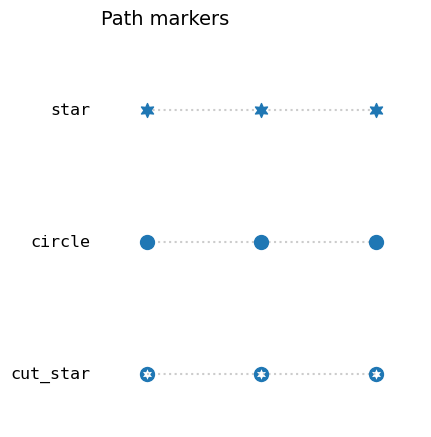

In [4]:
import matplotlib.path as mpath
import numpy as np

star = mpath.Path.unit_regular_star(6)
circle = mpath.Path.unit_circle()
# concatenate the circle with an internal cutout of the star
cut_star = mpath.Path(
    vertices=np.concatenate([circle.vertices, star.vertices[::-1, ...]]),
    codes=np.concatenate([circle.codes, star.codes]))

fig, ax = plt.subplots()
fig.suptitle('Path markers', fontsize=14)
fig.subplots_adjust(left=0.4)

markers = {'star': star, 'circle': circle, 'cut_star': cut_star}

for y, (name, marker) in enumerate(markers.items()):
    ax.text(-0.5, y, name, **text_style)
    ax.plot([y] * 3, marker=marker, **marker_style)
format_axes(ax)

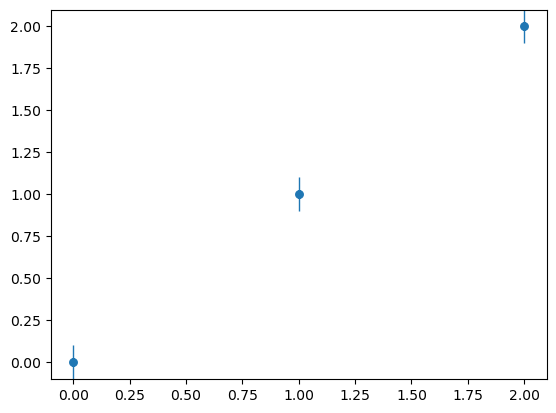

In [42]:
import matplotlib.path as mpath
import matplotlib.transforms as transforms
circle = mpath.Path.circle(radius=0.66)
line = mpath.Path([(-3,0),(3,0)])
marker = mpath.Path.make_compound_path(circle, line)
rotation_transform = transforms.Affine2D().rotate_deg(90)
marker = rotation_transform.transform_path(marker)
plt.scatter([0,1,2],[0,1,2], marker=marker, s=600)

In [5]:
import matplotlib.pyplot as plt
from matplotlib.path import Path
import matplotlib.patches as patches


# Define the circle as a Path
circle_radius = 0.5
circle_path = Path.unit_circle()
circle_path.vertices *= circle_radius  # Scale the circle to the desired radius

# Create a figure and axis
fig, ax = plt.subplots()

# Add the filled circle to the axis
circle_patch = patches.PathPatch(circle_path, facecolor='blue', lw=2, edgecolor='black')
ax.add_patch(circle_patch)

# Add a line through the circle
line_path = Path([(0, 0), (0.5, 0.5), (-0.5, -0.5)])
line_patch = patches.PathPatch(line_path, lw=2, edgecolor='red')
ax.add_patch(line_patch)
# Set aspect ratio to be equal
ax.set_aspect('equal')

# Show the plot
plt.gca().set_aspect('equal', adjustable='box')
plt.grid()
plt.show()

ValueError: output array is read-only

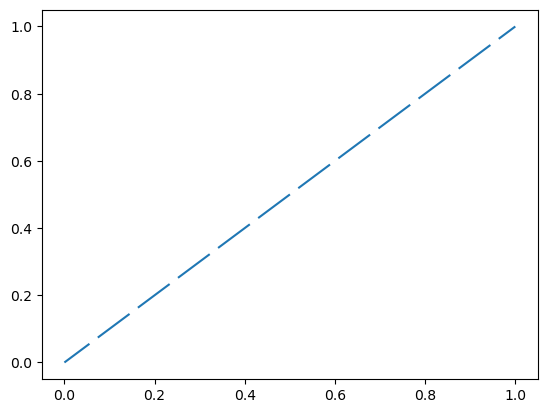

In [52]:
plt.plot([0,1], [0,1], linestyle=(4, (19, 5)))

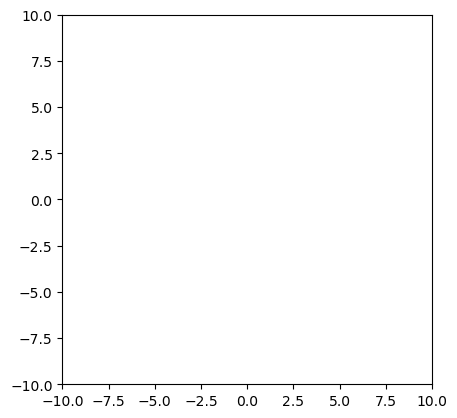

In [20]:
import matplotlib.pyplot as plt
from matplotlib.path import Path
import matplotlib.patches as patches
import matplotlib.transforms as transforms

# circle = Path.circle(radius=0.5)
# line = Path([(-3, 0), (3, 0)])
# path = Path.make_compound_path(circle, line)
# patch = patches.PathPatch(path, facecolor='black', lw=5)

xy=[1,1]
circle = Path.circle(radius=0.5)
line = Path([(-3, 0), (3, 0)])
path = Path.make_compound_path(circle, line)
patch = patches.PathPatch(path, facecolor='black', lw=5)
scale_transform = transforms.Affine2D().scale(1)
patch.set_transform(scale_transform)
# move_transform = transforms.Affine2D().translate(xy[0], xy[1])
# patch.set_transform(move_transform)


# verts = [
#    (0., 0.),  # left, bottom
#    (0., 1.),  # left, top
#    (1., 1.),  # right, top
#    (1., 0.),  # right, bottom
#    (0., 0.),  # ignored
# ]

# codes = [
#     Path.MOVETO,
#     Path.LINETO,
#     Path.LINETO,
#     Path.LINETO,
#     Path.CLOSEPOLY,
# ]

# path = Path(verts, codes)

fig, ax = plt.subplots()

ax.add_patch(patch)
ax.set_xlim(-10, 10)
ax.set_ylim(-10, 10)
ax.set_aspect('equal')
plt.show()

In [22]:
patch.vertices

AttributeError: 'PathPatch' object has no attribute 'vertices'

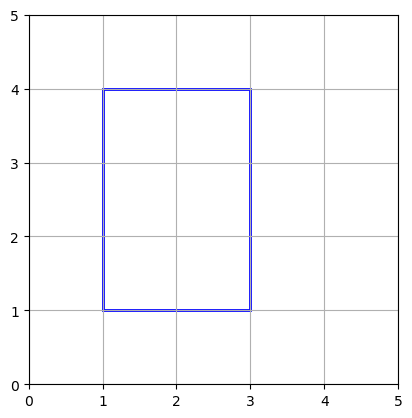

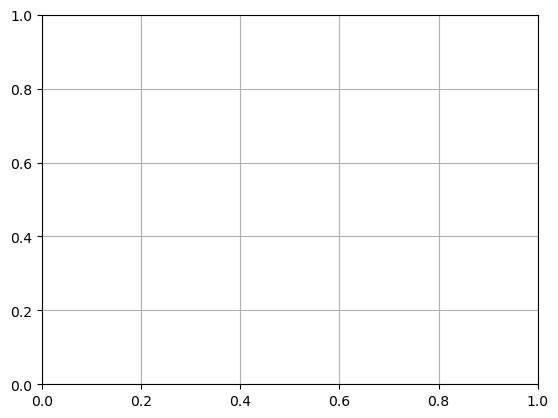

In [23]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.transforms as transforms

# Create a figure and axis
fig, ax = plt.subplots()

# Create a rectangle patch with the initial size
rectangle = patches.Rectangle((1, 1), 2, 3, edgecolor='blue', facecolor='none', lw=2)

# Add the rectangle patch to the axis
ax.add_patch(rectangle)

# Set axis limits
ax.set_xlim(0, 5)
ax.set_ylim(0, 5)

# Set aspect ratio to be equal
ax.set_aspect('equal')

# Show the plot
plt.grid()
plt.show()

# Scale the rectangle patch
scaling_factor = 0.5
scaling_transform = transforms.Affine2D().scale(scaling_factor, scaling_factor)
rectangle.set_transform(scaling_transform + ax.transData)

# Show the scaled plot
plt.grid()
plt.show()
